In [4]:
# 数据导入
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# 设置显示的列数，此处设置为8列；当设置成None，则显示全部的列
# 设置显示行数也是同样的方法
# pd.set_option('display.max_rows',8)
pd.set_option('display.max_columns', None)
# 观察数据可以发现，虽然有些数据看似没有内容，其实是有空格在其中，随意不能被识别为空值
# 所以使用skipinitialspace来跳过逗号分隔符之后的空格
# （Skip spaces after delimiter），才能被显示为NaN
raw = pd.read_csv('creditcard_exp.csv',skipinitialspace=True)
raw.head()

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
0,19,1,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,1600,0.102361,3
1,5,1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,1024,0.051184,2
2,95,0,NaN,NaN,1,36,8.40000,0,0,88.61,7.490000,1296,0.910000,1
3,86,1,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,1681,0.197218,3
4,50,1,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,784,0.062676,2


In [5]:
# 可以看出是有NaN，说明有空数据的
# 也通过describe看出
raw.describe(include='all')
# id的count是100， 但avg_exp是70条

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
count,100.000000,100.000000,70.000000,70.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.700000,983.655429,6.787787,0.240000,32.080000,6.142094,0.270000,0.110000,71.092800,6.646331,1089.800000,-0.504237,1.490000
std,29.011492,0.460566,446.294237,0.476035,0.429235,7.828567,3.325640,0.446196,0.314466,36.973676,3.371692,546.159521,0.466883,1.029808
min,1.000000,0.000000,163.180000,5.094854,0.000000,20.000000,1.500000,0.000000,0.000000,6.310000,1.840000,400.000000,-1.526850,0.000000
25%,25.750000,0.000000,697.155000,6.547003,0.000000,26.000000,3.879787,0.000000,0.000000,40.152500,4.346868,676.000000,-0.824868,1.000000
50%,50.500000,1.000000,884.150000,6.784627,0.000000,31.000000,5.535200,0.000000,0.000000,66.535000,5.971105,961.000000,-0.561270,1.000000
75%,75.250000,1.000000,1229.585000,7.114415,0.000000,37.000000,7.791238,1.000000,0.000000,100.522500,8.352039,1369.000000,-0.220382,2.000000
max,100.000000,1.000000,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,3025.000000,0.910000,3.000000


In [6]:
raw.corr()
# 由相关系数可以发现，“Age”和“age2”相关系数很高，几乎是一样的

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
id,1.000000,-0.159509,-0.066108,-0.079595,-0.010545,0.048744,-0.133415,-0.290667,-0.035984,0.057672,-0.165281,0.079211,0.243287,-0.046488
Acc,-0.159509,1.000000,NaN,NaN,0.163504,-0.180977,0.592094,0.398137,-0.397534,0.143170,0.618853,-0.190702,-0.251648,0.653815
avg_exp,-0.066108,NaN,1.000000,0.941926,0.206789,0.258478,0.674011,0.303726,0.012724,0.319499,0.704980,0.211898,-0.208444,0.766400
avg_exp_ln,-0.079595,NaN,0.941926,1.000000,0.236474,0.290307,0.634890,0.354106,0.042282,0.293038,0.662786,0.238639,-0.187300,0.812407
gender,-0.010545,0.163504,0.206789,0.236474,1.000000,0.198636,0.651942,0.396609,-0.047893,0.186500,0.629293,0.186086,0.099265,0.348256
Age,0.048744,-0.180977,0.258478,0.290307,0.198636,1.000000,0.119538,0.251117,0.152306,-0.002336,0.106420,0.990755,0.082945,0.002606
Income,-0.133415,0.592094,0.674011,0.634890,0.651942,0.119538,1.000000,0.588918,-0.132688,0.247363,0.990375,0.080490,-0.029125,0.706609
Ownrent,-0.290667,0.398137,0.303726,0.354106,0.396609,0.251117,0.588918,1.000000,-0.141818,0.081386,0.578177,0.232051,0.019477,0.434600
Selfempl,-0.035984,-0.397534,0.012724,0.042282,-0.047893,0.152306,-0.132688,-0.141818,1.000000,0.004178,-0.152281,0.135163,0.154581,-0.230504
dist_home_val,0.057672,0.143170,0.319499,0.293038,0.186500,-0.002336,0.247363,0.081386,0.004178,1.000000,0.261563,-0.007408,-0.126949,0.354275


In [7]:
# 划分训练集和测试集，本例预测未办卡的人的消费，也就是说
# Acc=0或者avg_exp为空的人，因此只需要从从avg_exp这列开始取值即可
# 训练集
exp = raw[raw['avg_exp'].notnull()].iloc[:, 2:].drop('age2', axis=1).copy()
exp.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3


In [8]:
# 测试集
exp_new = raw[raw['avg_exp'].isnull()].iloc[:,2:].drop('age2', axis=1).copy()
exp_new.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
2,NaN,NaN,1,36,8.40,0,0,88.61,7.49,0.91,1
11,NaN,NaN,1,22,5.10,0,0,109.07,4.78,0.32,1
13,NaN,NaN,0,27,4.90,0,1,53.93,5.43,-0.53,1
19,NaN,NaN,0,41,4.39,0,1,97.06,4.65,-0.26,1
20,NaN,NaN,1,54,4.18,0,0,10.01,4.59,-0.41,0


In [9]:
exp.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,983.655429,6.787787,0.285714,31.157143,7.424706,0.385714,0.028571,74.540857,8.005472,-0.580766,1.928571
std,446.294237,0.476035,0.455016,7.206349,3.077986,0.490278,0.167802,36.949228,3.070744,0.432808,0.873464
min,163.180000,5.094854,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,0.000000
25%,697.155000,6.547003,0.000000,26.000000,5.175662,0.000000,0.000000,49.302500,5.915553,-0.887981,1.000000
50%,884.150000,6.784627,0.000000,30.000000,6.443525,0.000000,0.000000,65.660000,7.084184,-0.612068,2.000000
75%,1229.585000,7.114415,1.000000,36.000000,8.494237,1.000000,0.000000,105.067500,9.123105,-0.302082,3.000000
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000


In [10]:
raw.describe(include='all')

,id,Acc,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,age2,high_avg,edu_class
count,100.000000,100.000000,70.000000,70.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,0.700000,983.655429,6.787787,0.240000,32.080000,6.142094,0.270000,0.110000,71.092800,6.646331,1089.800000,-0.504237,1.490000
std,29.011492,0.460566,446.294237,0.476035,0.429235,7.828567,3.325640,0.446196,0.314466,36.973676,3.371692,546.159521,0.466883,1.029808
min,1.000000,0.000000,163.180000,5.094854,0.000000,20.000000,1.500000,0.000000,0.000000,6.310000,1.840000,400.000000,-1.526850,0.000000
25%,25.750000,0.000000,697.155000,6.547003,0.000000,26.000000,3.879787,0.000000,0.000000,40.152500,4.346868,676.000000,-0.824868,1.000000
50%,50.500000,1.000000,884.150000,6.784627,0.000000,31.000000,5.535200,0.000000,0.000000,66.535000,5.971105,961.000000,-0.561270,1.000000
75%,75.250000,1.000000,1229.585000,7.114415,0.000000,37.000000,7.791238,1.000000,0.000000,100.522500,8.352039,1369.000000,-0.220382,2.000000
max,100.000000,1.000000,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,3025.000000,0.910000,3.000000


### 简单线性回归分析

#### 相关性分析

- 散点图

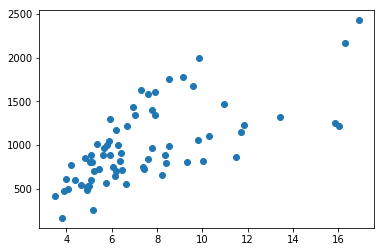

In [11]:
# 暂且认为月平均支出和收入有关系
# exp.plot('Income', 'avg_exp', kind='scatter')  pandas自带方法
plt.scatter(exp['Income'], exp['avg_exp'])
plt.show()

- 相关系数

In [12]:
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corr(method='pearson')
# 默认的method也是皮尔森相关系数

,Income,avg_exp,Age,dist_home_val
Income,1.000000,0.674011,0.369129,0.249153
avg_exp,0.674011,1.000000,0.258478,0.319499
Age,0.369129,0.258478,1.000000,0.109323
dist_home_val,0.249153,0.319499,0.109323,1.000000


In [13]:
# 也可以指定和哪个变量比较
exp[['Income', 'avg_exp', 'Age', 'dist_home_val']].corrwith(exp['Income'])

Income           1.000000
avg_exp          0.674011
Age              0.369129
dist_home_val    0.249153
dtype: float64

### OLS

In [14]:
from statsmodels.formula.api import ols

lm_s = ols('avg_exp ~ Income', data=exp).fit()
lm_s.params
# 得到的模型是
# y = 97.7x + 258.0

Intercept    258.049498
Income        97.728578
dtype: float64

- 得到预测值和残差

In [15]:
pd.DataFrame([lm_s.predict(exp), lm_s.resid], index=['predict', 'resid']).T.head()
# 转置矩阵
# lm_s.predict(exp) 预测值
# lm_s.resid 残差

,predict,resid
0,1825.141904,-608.111904
1,1806.803136,-555.303136
3,1379.274813,-522.704813
4,1568.506658,-246.676658
5,1238.281793,-422.251793


In [16]:
exp[['avg_exp']].head()

,avg_exp
0,1217.03
1,1251.50
3,856.57
4,1321.83
5,816.03


In [17]:
# 计算测试集上的预测值
lm_s.predict(exp_new).head()

2     1078.969552
11     756.465245
13     736.919530
19     687.077955
20     666.554953
dtype: float64

### 多元线性回归
- 其实还是使用OLS方法，只是需要变量的筛选

In [18]:
lm_m = ols('avg_exp ~ Income + dist_home_val + dist_avg_income', data=exp).fit()
lm_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.541
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     25.95
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.34e-11
Time:                        17:17:19   Log-Likelihood:                -498.62
No. Observations:                  70   AIC:                             1005.
Df Residuals:                      66   BIC:                             1014.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           2.3507    122.525      0.019      0.985    -242.278     246.980
Income           -164.4378     86.487     -1.901      0.062    -337.115       8.239
dist_home_val       1.5396      1.049      1.468      0.147      -0.555       3.634
dist_avg_income   260.7522     87.058      2.995      0.004      86.934     434.570
==============================================================================
Omnibus:                        5.379   Durbin-Watson:                   1.593
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.367
Skew:                           0.642   Prob(JB):                       0.0683
Kurtosis:                       2.563   Cond. No.                         325.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
lm_m.predict(exp_new).head()

2     710.530521
11    578.037286
13    695.520156
19    642.399765
20    527.264307
dtype: float64

In [20]:
lm_m.params

Intercept            2.350664
Income            -164.437844
dist_home_val        1.539601
dist_avg_income    260.752162
dtype: float64

### 多元线性回归的变量筛选

- 向前法

In [21]:
'''forward select'''
def forward_select(data, respone):
    remaining = set(data.columns)
    remaining.remove(respone)
    select = []
    current_score, best_new_score = float('inf'),float('inf')
    
    while remaining:
        aic_with_candidates = []
        for candidates in remaining:
            formula = "{} ~ {}".format(respone, ' + '.join(select + [candidates]))
            aic = ols(formula=formula, data=data).fit().aic
            aic_with_candidates.append((aic, candidates))
        aic_with_candidates.sort(reverse=True)
#       pop默认取出并返回最后一个元素
        best_new_score, best_candidate=aic_with_candidates.pop()
#       选出最小的aic值
        if current_score > best_new_score:
            remaining.remove(best_candidate)
            select.append(best_candidate)
            current_score = best_new_score
            print('aic is {}, continuing!'.format(current_score))
        else:
            print('forward selection over!')
            break
            
    formula = '{} ~ {}'.format(respone, '+'.join(select))
    print('final formula is {}'.format(formula))
    model = ols(formula=formula, data=data).fit()
    return model

In [22]:
data_for_select = exp[['avg_exp', 'Income', 'Age', 'dist_home_val', 
                       'dist_avg_income']]
lm_m = forward_select(data=data_for_select, respone='avg_exp')
print(lm_m.rsquared)

aic is 1007.6801413968115, continuing!
aic is 1005.4969816306302, continuing!
aic is 1005.2487355956046, continuing!
forward selection over!
final formula is avg_exp ~ dist_avg_income+Income+dist_home_val
0.541151292841195


## 线性回归诊断
- 残差分析
- 强影响点分析
- 多重共线性分析

### 残差分析

关于残差分析
https://www.jianshu.com/p/c9022affd8b9

In [23]:
# 使用简单线性回归例子
ana1 = lm_s
ana1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                avg_exp   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     56.61
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.60e-10
Time:                        17:17:19   Log-Likelihood:                -504.69
No. Observations:                  70   AIC:                             1013.
Df Residuals:                      68   BIC:                             1018.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    258.0495    104.290      2.474      0.016      49.942     466.157
Income        97.7286     12.989      7.524      0.000      71.809     123.648
==============================================================================
Omnibus:                        3.714   Durbin-Watson:                   1.424
Prob(Omnibus):                  0.156   Jarque-Bera (JB):                3.507
Skew:                           0.485   Prob(JB):                        0.173
Kurtosis:                       2.490   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
# 查看训练集
exp.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3


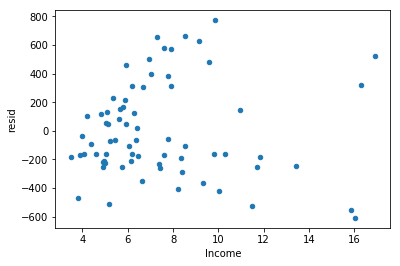

In [25]:
# 将预测值和残差值加入到exp中
exp['Pred'] = ana1.predict(exp)
exp['resid'] = ana1.resid
exp.plot('Income', 'resid', kind='scatter')
plt.show()
# 可以发现，残差图呈现出一种增大的趋势 --> 异方差

使用对解释变量取对数的方法来解决异方差的问题（还可以使用加权最小二乘法，但据说取对数比较常用也简单）

In [26]:
# 使用取过对数的训练数据来重新训练模型
ana2 = ols('avg_exp_ln ~ Income', data=exp).fit()
ana2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.403
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     45.92
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           3.58e-09
Time:                        17:17:19   Log-Likelihood:                -28.804
No. Observations:                  70   AIC:                             61.61
Df Residuals:                      68   BIC:                             66.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.0587      0.116     52.077      0.000       5.827       6.291
Income         0.0982      0.014      6.776      0.000       0.069       0.127
==============================================================================
Omnibus:                       10.765   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               12.708
Skew:                          -0.688   Prob(JB):                      0.00174
Kurtosis:                       4.569   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

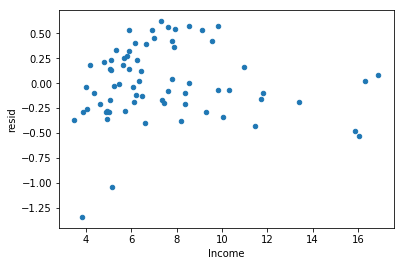

In [27]:
# 查看残差图
exp['Pred'] = ana2.predict(exp)
exp['resid'] = ana2.resid
exp.plot('Income', 'resid', kind='scatter')
plt.show()

In [28]:
# 对自变量也取对数
exp['Income_ln'] = np.log(exp['Income'])

In [29]:
ana3 = ols('avg_exp_ln ~ Income_ln', data=exp).fit()
ana3.summary()
# 可以看到R2和AIC/BIC都有较好的效果相比于ana1模型

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.473
Method:                 Least Squares   F-statistic:                     62.87
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.95e-11
Time:                        17:17:20   Log-Likelihood:                -23.950
No. Observations:                  70   AIC:                             51.90
Df Residuals:                      68   BIC:                             56.40
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.0611      0.222     22.833      0.000       4.619       5.503
Income_ln      0.8932      0.113      7.929      0.000       0.668       1.118
==============================================================================
Omnibus:                        8.382   Durbin-Watson:                   1.368
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.074
Skew:                          -0.668   Prob(JB):                       0.0177
Kurtosis:                       3.992   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

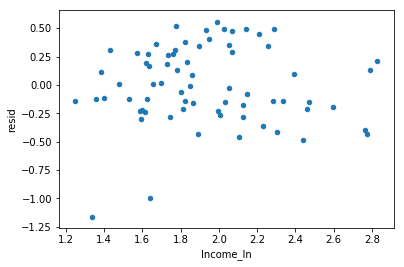

In [30]:
# 查看ana3的残差图
exp['Pred'] = ana3.predict(exp)
exp['resid'] = ana3.resid
exp.plot('Income_ln', 'resid', kind='scatter')
plt.show()
# 可见残差分布更加趋于正态分布

### 残差图中发现离群点，说明此点和实际值偏差很大，可以认为是强影响点

- 使用学生化残差处理这个问题（学生化残差=残差/标准误差）

In [31]:
exp['resid_t'] = (exp['resid'] - exp['resid'].mean()) / exp['resid'].std()
exp['resid_t'].head()

0   -1.268422
1   -1.156390
3   -1.420551
4   -0.562182
5   -1.212052
Name: resid_t, dtype: float64

- 经过标准化之后，一般认为abs(学生化残差)大于两倍的标准差，就是离群值，要剔除

In [32]:
exp[abs(exp['resid_t']) > 2][['resid_t']]

,resid_t
73,-2.910292
98,-3.387317


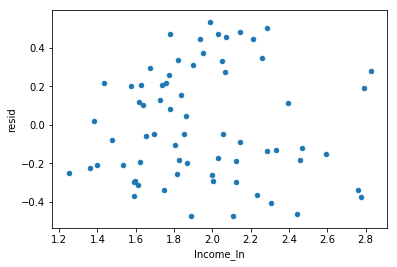

In [33]:
# 画出新的残差图
exp2 = exp[abs(exp['resid_t']) < 2].copy()
ana4 = ols('avg_exp_ln ~ Income_ln', data=exp2).fit()
exp2['Pred'] = ana4.predict(exp2)
exp2['resid'] = ana4.resid
exp2.plot('Income_ln', 'resid', kind='scatter')
plt.show()

In [34]:
ana4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.494
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     64.43
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.37e-11
Time:                        17:17:20   Log-Likelihood:                -11.560
No. Observations:                  68   AIC:                             27.12
Df Residuals:                      66   BIC:                             31.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.3123      0.192     27.598      0.000       4.928       5.697
Income_ln      0.7804      0.097      8.027      0.000       0.586       0.975
==============================================================================
Omnibus:                       17.307   Durbin-Watson:                   1.644
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.415
Skew:                           0.215   Prob(JB):                        0.110
Kurtosis:                       1.828   Cond. No.                         13.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

在以上的基础上添加其他的变量，之前已经对变量进行了筛选，现在就可以把剩余的变量进行对数变换之后添加进来

In [35]:
exp2['dist_home_val_ln'] = np.log(exp2['dist_home_val'])
exp2['dist_avg_income_ln'] = np.log(exp2['dist_avg_income'])

ana5 = ols('''avg_exp_ln ~ Age + Income_ln + 
           dist_home_val_ln + dist_avg_income_ln''', exp2).fit()
ana5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.525
Method:                 Least Squares   F-statistic:                     19.48
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.79e-10
Time:                        17:17:20   Log-Likelihood:                -7.3496
No. Observations:                  68   AIC:                             24.70
Df Residuals:                      63   BIC:                             35.80
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.6265      0.317     14.574      0.000       3.992       5.261
Age                   -0.0006      0.005     -0.117      0.907      -0.011       0.010
Income_ln             -0.1802      0.569     -0.317      0.752      -1.317       0.957
dist_home_val_ln       0.1258      0.058      2.160      0.035       0.009       0.242
dist_avg_income_ln     1.0093      0.612      1.649      0.104      -0.214       2.233
==============================================================================
Omnibus:                        4.111   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.128   Jarque-Bera (JB):                2.466
Skew:                           0.248   Prob(JB):                        0.291
Kurtosis:                       2.210   Cond. No.                         807.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 多重共线性分析

多重共线性使用VIF（方差膨胀因子）来进行判断，一般认为大于10则表示某变量存在严重的共线性

- VI = 1 / （1 - Ri^2）

In [56]:
'''实现VIF'''
def vif(df, col_i):
    cols = list(df.columns)
    cols.remove(col_i)
    cols_noti = cols
#   remove没有返回值，直接修改list，所以不能写成
#   cols_noti = cols.remove(col_i)
    formula = col_i + '~' + '+'.join(cols_noti)
    r2 = ols(formula, data=df).fit().rsquared
    return 1./(1. - r2)

In [37]:
exp2.head()

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,Pred,resid,Income_ln,resid_t,dist_home_val_ln,dist_avg_income_ln
0,1217.03,7.104169,1,40,16.03515,1,1,99.93,15.932789,0.102361,3,7.477774,-0.373605,2.774783,-1.268422,4.604470,2.768379
1,1251.50,7.132098,1,32,15.84750,1,0,49.88,15.796316,0.051184,2,7.468587,-0.336489,2.763012,-1.156390,3.909620,2.759777
3,856.57,6.752936,1,41,11.47285,1,0,16.10,11.275632,0.197218,3,7.216497,-0.463561,2.439983,-1.420551,2.778819,2.422644
4,1321.83,7.186772,1,28,13.40915,1,0,100.39,13.346474,0.062676,2,7.338203,-0.151430,2.595937,-0.562182,4.609063,2.591252
5,816.03,6.704451,1,41,10.03015,0,1,119.76,10.332263,-0.302113,3,7.111621,-0.407170,2.305596,-1.212052,4.785490,2.335271


In [57]:
exog = exp2[['Age', 'Income_ln', 'dist_home_val_ln',
             'dist_avg_income_ln']]

for i in exog.columns:
    print(i, '\t', vif(df=exog, col_i=i))

Age 	 1.1691185387170273
Income_ln 	 36.98331414029262
dist_home_val_ln 	 1.0536287165865759
dist_avg_income_ln 	 36.92286614125582


可以发现Income_ln 和 dist_avg_income_ln具有共线性，可以使用其他的值代替（使用一个有意义的值代替其中一个值也是解决共线性的一个方法），此处可以使用“高出平均收入的比率”代替其中一个（high_avg / dist_avg_income）

In [59]:
exp2['high_avg_ratio'] = exp2['high_avg'] / exp2['dist_avg_income']

In [61]:
exog1 = exp2[['Age', 'high_avg_ratio', 'dist_home_val_ln', 
              'dist_avg_income_ln']]

for i in exog1.columns:
    print(i, '\t', vif(df=exog1, col_i=i))

Age 	 1.1707655829292059
high_avg_ratio 	 1.1347192500556709
dist_home_val_ln 	 1.0527329388079925
dist_avg_income_ln 	 1.308904149355328


共线性被消除，都小于10

使用向前法再次进行变量筛选

In [64]:
var_select = exp2[['avg_exp_ln', 'Age', 'high_avg_ratio', 
                   'dist_home_val_ln', 'dist_avg_income_ln']]

ana7 = forward_select(data=var_select, respone='avg_exp_ln')
print(ana7.rsquared)

aic is 23.816793700737364, continuing!
aic is 20.83095227956072, continuing!
forward selection over!
final formula is avg_exp_ln ~ dist_avg_income_ln+dist_home_val_ln
0.5520397736845982


使用向前法筛选之后，可以得到最后变量的结果，发现之前新建的变量并没有被选入。

以上都是对连续型变量进行的处理，以下是对离散型变量进行处理

In [71]:
exp2.describe(include='all')

,avg_exp,avg_exp_ln,gender,Age,Income,Ownrent,Selfempl,dist_home_val,dist_avg_income,high_avg,edu_class,Pred,resid,Income_ln,resid_t,dist_home_val_ln,dist_avg_income_ln,high_avg_ratio
count,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.800000e+01,68.000000,68.000000,68.000000,68.000000,68.000000
mean,1006.487353,6.831214,0.294118,31.323529,7.511113,0.397059,0.029412,74.872941,8.101358,-0.590244,1.985294,6.831214,-1.136346e-15,1.946283,0.092612,4.162097,2.031896,-0.080186
std,431.912233,0.406182,0.459033,7.220289,3.078659,0.492926,0.170214,37.444381,3.060665,0.435372,0.819404,0.285477,2.889401e-01,0.365810,0.850575,0.603386,0.339630,0.059081
min,418.780000,6.037346,0.000000,20.000000,3.493900,0.000000,0.000000,13.130000,3.828842,-1.526850,1.000000,6.288632,-4.728044e-01,1.251019,-1.420551,2.574900,1.342562,-0.199313
25%,709.185000,6.564094,0.000000,26.000000,5.306125,0.000000,0.000000,47.930000,5.945474,-0.905507,1.000000,6.614688,-2.302820e-01,1.668827,-0.573183,3.868801,1.782628,-0.123922
50%,886.520000,6.787301,0.000000,30.000000,6.541800,0.000000,0.000000,66.730000,7.142605,-0.635066,2.000000,6.778031,-5.377803e-02,1.878133,-0.000318,4.200655,1.966051,-0.083749
75%,1238.202500,7.121397,1.000000,36.000000,8.533837,1.000000,0.000000,107.102500,9.164474,-0.302103,3.000000,6.985543,2.287526e-01,2.144039,0.819361,4.673731,2.215313,-0.043883
max,2430.030000,7.795659,1.000000,55.000000,16.900150,1.000000,1.000000,157.900000,18.427000,0.259337,3.000000,7.518775,5.315189e-01,2.827322,1.627675,5.061962,2.913817,0.038568


根据这份数据的意义来看，有：

- gender (性别)
- Ownrent (是否有自有住房)
- Selfempl (是否自谋职业)
- edu_class (教育等级)

In [80]:
formula8 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(gender) + C(Ownrent) + C(Selfempl) + C(edu_class)
'''

ana8 = ols(formula=formula8, data=exp2).fit()
ana8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     58.71
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           1.75e-24
Time:                        18:15:17   Log-Likelihood:                 35.337
No. Observations:                  68   AIC:                            -54.67
Df Residuals:                      60   BIC:                            -36.92
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5520      0.212     21.471      0.000       4.128       4.976
C(gender)[T.1]        -0.4301      0.060     -7.200      0.000      -0.550      -0.311
C(Ownrent)[T.1]        0.0184      0.045      0.413      0.681      -0.071       0.107
C(Selfempl)[T.1]      -0.3805      0.119     -3.210      0.002      -0.618      -0.143
C(edu_class)[T.2]      0.2895      0.051      5.658      0.000       0.187       0.392
C(edu_class)[T.3]      0.4686      0.060      7.867      0.000       0.349       0.588
dist_avg_income_ln     0.9563      0.098      9.722      0.000       0.760       1.153
dist_home_val_ln       0.0522      0.034      1.518      0.134      -0.017       0.121
==============================================================================
Omnibus:                        3.788   Durbin-Watson:                   2.129
Prob(Omnibus):                  0.150   Jarque-Bera (JB):                4.142
Skew:                           0.020   Prob(JB):                        0.126
Kurtosis:                       4.208   Cond. No.                         60.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

观察P-value发现Ownrent很大，并不显著，所以去除

In [83]:
formula9 = '''
avg_exp_ln ~ dist_avg_income_ln + dist_home_val_ln + 
C(Selfempl) + C(gender) + C(edu_class)
'''
# 此处使用了性别和教育等级交叉的方法，去除了Ownrent，又fit了一次模型
ana9 = ols(formula9, exp2).fit()
ana9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             avg_exp_ln   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     69.41
Date:                Sun, 22 Jul 2018   Prob (F-statistic):           2.18e-25
Time:                        18:18:15   Log-Likelihood:                 35.240
No. Observations:                  68   AIC:                            -56.48
Df Residuals:                      61   BIC:                            -40.94
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              4.5350      0.207     21.955      0.000       4.122       4.948
C(Selfempl)[T.1]      -0.3861      0.117     -3.302      0.002      -0.620      -0.152
C(gender)[T.1]        -0.4281      0.059     -7.240      0.000      -0.546      -0.310
C(edu_class)[T.2]      0.2888      0.051      5.687      0.000       0.187       0.390
C(edu_class)[T.3]      0.4674      0.059      7.911      0.000       0.349       0.586
dist_avg_income_ln     0.9697      0.092     10.516      0.000       0.785       1.154
dist_home_val_ln       0.0515      0.034      1.511      0.136      -0.017       0.120
==============================================================================
Omnibus:                        4.030   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.133   Jarque-Bera (JB):                4.592
Skew:                           0.044   Prob(JB):                        0.101
Kurtosis:                       4.270   Cond. No.                         58.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""